# SRAG - Agrupamento e Detecção de Anomalias

Este é um trabalho realizado para a disciplina de Sistemas de Apoio à Decisão do curso de Sistemas de Informação da Universidade Federal de Ouro Preto.

A base de dados disponibilizada pelo governo diz respeito a Casos de Síndrome Respiratória Aguda Grave Hospitalizados. Para este trabalho iremos trabalhar com uma amostragem de 1000 registros aleatórios. 

<center><img src="img/srag.jpg"></center>

A SRAG é um agravamento de infecções respiratórias. Os sintomas geralmente são febre de início súbito, mesmo que referida, acompanhada de tosse ou dor de garganta e pelo menos um dos sintomas: mialgia, cefaleia ou artralgia.

A evolução para Síndrome Respiratória Aguda acontece quando o paciente apresenta os sintomas acima e mais algum dos sintomas abaixo:

• Dispneia;

• Desconforto respiratório;

• Insuficiência respiratória;

• Saturação de oxigênio menor que 95%;

• Exacerbação de doença preexistente.

## 1.0. Importar Dados

In [2]:
# Bilioteca para análise e manipulação de dados
import pandas as pd

In [150]:
# Lendo o arquivo de amostra da base de dados
df = pd.read_csv('sample_SRAG.csv')
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,19/07/2020,30,14/07/2020,29,MG,BELO HORIZONTE,1449.0,CONTAGEM,311860,UNIDADE PRONTO ATENDIMENTO CONTAGEM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/08/2020,32,03/08/2020,32,MG,PASSOS,1455.0,MONTE SANTO DE MINAS,314320,SANTA CASA DE MISERICORDIA DE MONTE SANTO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05/06/2020,23,02/06/2020,23,PA,01 REGIONAL DE PROTECAO SOCIAL,1484.0,BELEM,150140,UPA DAGUA I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/06/2020,24,07/06/2020,24,SP,GVE XII ARARAQUARA,1337.0,IBITINGA,351960,CENTRO DE SAUDE II IBITINGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18/06/2020,25,13/06/2020,24,PA,04 REGIONAL DE PROTECAO SOCIAL,1487.0,CAPANEMA,150220,ASSOCIACAO GUIOMAR JESUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.0. Seleção das Features

In [52]:
# Dimensões do dataframe
# 1000 linhas e 154 colunas
df.shape

(1000, 154)

### 2.1. Exclusão de Atributos

In [151]:
# Deletar colunas irrelevantes para o trabalho
df = df.drop(['RES_IGA', 'RES_IGM', 'RES_IGG', 'DT_RES', 'OUT_SOR', 'TP_SOR', 'DT_CO_SOR', 'SOR_OUT',
             'TP_AM_SOR', 'DS_AN_OUT', 'AN_OUTRO', 'AN_ADENO', 'AN_PARA3', 'AN_PARA2', 'AN_PARA1',
             'AN_VSR', 'AN_SARS2', 'POS_AN_OUT', 'TP_FLU_AN', 'POS_AN_FLU', 'RES_AN', 'DT_RES_AN',
             'TP_TES_AN', 'DT_TOMO', 'TOMO_OUT', 'TOMO_RES', 'OBES_IMC', 'MORB_DESC', 'M_AMAMENTA',
             'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 
             'PAC_COCBO', 'PAC_DSCBO', 'OUT_ANIM', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT', 'CLASSI_OUT',
             'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 
              'PCR_PARA3', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'POS_PCROUT', 'POS_PCRFLU', 'TP_FLU_PCR',
              'PCR_FLUASU', 'OUT_AMOST', 'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA', 'DT_PCR', 'DT_COLETA',
             'DT_RAIOX', 'RAIOX_OUT', 'DT_NOTIFIC', 'DT_ENTUTI', 'DT_SAIDUTI', 'ID_UNIDADE', 'ID_REGIONA',
             'DT_SIN_PRI', 'ID_MUNICIP', 'DT_NASC', 'DT_INTERNA', 'DT_VAC_MAE', 'DT_NASC', 'AMOSTRA', 'TP_AMOSTRA', 
             'CO_REGIONA', 'CO_MUN_NOT', 'CO_UNI_NOT', 'DT_UT_DOSE', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE',
             'CS_ETINIA', 'ID_PAIS', 'CO_PAIS', 'CS_ESCOL_N', 'MAE_VAC', 'OUTRO_DES', 'SG_UF_NOT', 'ID_RG_RESI',
             'CO_RG_RESI', 'ID_MN_RESI', 'CO_MUN_RES', 'CS_ZONA', 'DT_ANTIVIR', 'TP_AMOSTRA', 'SUPORT_VEN',
             'ID_RG_INTE', 'CO_RG_INTE', 'ID_MN_INTE', 'CO_MU_INTE', 'OUT_ANTIV', 'SEM_NOT', 'TP_ANTIVIR', 
              'SEM_PRI', 'TP_IDADE', 'CS_GESTANT', 'COD_IDADE', 'PCR_RESUL', 'PCR_RESUL', 'CRITERIO', 
              'CS_RACA'], axis=1)
df.head()

,CS_SEXO,NU_IDADE_N,SG_UF,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,...,HOSPITAL,SG_UF_INTE,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,F,76,MG,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,1.0,MG,NaN,NaN,5.0,NaN,2.0,2.0,2.0,2.0
1,M,86,MG,2.0,2.0,2.0,1.0,2.0,2.0,1.0,...,1.0,MG,2.0,NaN,4.0,2.0,2.0,2.0,2.0,2.0
2,F,95,PA,1.0,NaN,NaN,2.0,2.0,NaN,1.0,...,1.0,PA,2.0,4.0,5.0,2.0,NaN,NaN,NaN,NaN
3,M,54,SP,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,1.0,SP,2.0,2.0,4.0,1.0,NaN,NaN,NaN,NaN
4,F,37,PA,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,PA,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2. Dicionário de Variáveis

De acordo com a fonte dos dados, essa é a descrição de cada uma das variáveis presentes no dataset.

- CS_SEXO - Sexo do paciente
- NU_IDADE_N - Idade do Paciente
- SG_UF - UF da residência do Paciente
- SURTO_SG - Se o caso é proveniente de SG
- NOSOCOMIAL - Caso de SRAG com infecção adquirida após internação.
- AVE_SUINO - Caso com contato direto com aves ou suínos.
- FEBRE - Se o Paciente apresentou febre
- TOSSE - Se o Paciente apresentou tosse
- GARGANTA - Se o Paciente apresentou dor de garganta
- DISPNEIA - Se o Paciente apresentou dispneia
- DESC_RESP - Se o Paciente apresentou desconforto respiratório
- SATURACAO - Se o Paciente apresentou saturação O2 < 95%
- DIARREIA - Se o Paciente apresentou diarreia
- VOMITO - Se o Paciente apresentou vômito
- DOR_ABD - Se o Paciente apresentou dor abdominal
- FADIGA - Se o Paciente apresentou fadiga
- PERD_OLFT - Se o Paciente apresentou perda de olfato
- PERD_PALA - Se o Paciente apresentou perda de paladar
- OUTRO_SIN - Se o Paciente apresentou outros sintomas
- PUERPERA - Se o Paciente era puérpera ou parturiente (mulher que pariu recentemente – até 45 dias do parto)
- FATOR_RISC - Se o Paciente apresentou algum fator de risco
- CARDIOPATI - Se o Paciente possuia Doença Cardiovascular Crônica
- HEMATOLOGI - Se o Paciente possuia Doença Hematológica Crônica
- SIND_DOWN - Se o Paciente possuia Síndrome de Down
- HEPATICA - Se o Paciente possuia Doença Hepática Crônica
- ASMA - Se o Paciente possuia asma
- DIABETES - Se o Paciente possuia diabetes
- NEUROLOGIC - Se o Paciente possuia Doença Neurológica
- PNEUMOPATI - Paciente possui outra pneumopatia crônica
- IMUNODEPRE - Se o Paciente possuia Imunodeficiência ou Imunodepressão (diminuição da função do sistema imunológico)
- RENAL - Se o Paciente possuia Doença Renal Crônica
- OBESIDADE - Se o Paciente possuia obesidade
- OUT_MORBI - Se o Paciente possuia outro fator de risco
- VACINA - Se o Paciente foi vacinado contra a gripe na última campanha
- ANTIVIRAL - Se o Paciente usou antiviral para a gripe
- HOSPITAL - Se o Paciente foi internado
- SG_UF_INTE - UF de internação do paciente
- UTI - Se o Paciente foi internado na UTI
- RAIOX_RES - Resultado do Raio X de tórax
- CLASSI_FIN - Diagnóstico final do caso.
- EVOLUCAO - Evolução do caso 

In [101]:
# Colunas presentes no dataset
df.columns

Index(['CS_SEXO', 'NU_IDADE_N', 'SG_UF', 'SURTO_SG', 'NOSOCOMIAL', 'AVE_SUINO',
       'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO',
       'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'PUERPERA', 'FATOR_RISC',
       'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES',
       'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE',
       'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'HOSPITAL', 'UTI', 'RAIOX_RES',
       'CLASSI_FIN', 'EVOLUCAO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
       'PERD_PALA'],
      dtype='object')

## 3.0. Preparação dos Dados

Esta base de dados possui muitos valores faltantes, e os dados precisam ser normalizados.

### 3.1. Preenchimento de valores faltantes

In [37]:
# Contando valores NaN em todas as colunas do dataset
# Apenas as colunas CS_SEXO, NU_IDADE_N, FATOR_RISC e SG_UF_INTE não possuem valores faltantes
df.isnull().sum()

CS_SEXO         0
NU_IDADE_N      0
SG_UF           0
SURTO_SG      163
NOSOCOMIAL    209
AVE_SUINO     187
FEBRE         118
TOSSE          87
GARGANTA      242
DISPNEIA      101
DESC_RESP     155
SATURACAO     145
DIARREIA      252
VOMITO        258
OUTRO_SIN     252
PUERPERA      610
FATOR_RISC      0
CARDIOPATI    500
HEMATOLOGI    606
SIND_DOWN     610
HEPATICA      609
ASMA          600
DIABETES      529
NEUROLOGIC    594
PNEUMOPATI    592
IMUNODEPRE    606
RENAL         595
OBESIDADE     595
OUT_MORBI     530
VACINA        209
ANTIVIRAL     132
HOSPITAL       37
SG_UF_INTE      0
UTI           156
RAIOX_RES     307
CLASSI_FIN    124
EVOLUCAO      228
DOR_ABD       722
FADIGA        720
PERD_OLFT     721
PERD_PALA     721
dtype: int64

In [152]:
# Como as colunas deste dataset representam valores categóricas, a medida de centralidade Moda será usada para
# preencher os valores faltantes
# Por fim é verificado se ainda há NaN's

# O cálculo da Moda é feito com a biblioteca statistics
import statistics as sts

df['SURTO_SG'].fillna(sts.mode(df['SURTO_SG']), inplace=True)

df['NOSOCOMIAL'].fillna(sts.mode(df['NOSOCOMIAL']), inplace=True)

df['AVE_SUINO'].fillna(sts.mode(df['AVE_SUINO']), inplace=True)

df['FEBRE'].fillna(sts.mode(df['FEBRE']), inplace=True)

df['TOSSE'].fillna(sts.mode(df['TOSSE']), inplace=True)

df['GARGANTA'].fillna(sts.mode(df['GARGANTA']), inplace=True)

df['DISPNEIA'].fillna(sts.mode(df['DISPNEIA']), inplace=True)

df['DESC_RESP'].fillna(sts.mode(df['DESC_RESP']), inplace=True)

df['SATURACAO'].fillna(sts.mode(df['SATURACAO']), inplace=True)

df['DIARREIA'].fillna(sts.mode(df['DIARREIA']), inplace=True)

df['VOMITO'].fillna(sts.mode(df['VOMITO']), inplace=True)

df['OUTRO_SIN'].fillna(sts.mode(df['OUTRO_SIN']), inplace=True)

df['PUERPERA'].fillna(sts.mode(df['PUERPERA']), inplace=True)

df['CARDIOPATI'].fillna(sts.mode(df['CARDIOPATI']), inplace=True)

df['HEMATOLOGI'].fillna(sts.mode(df['HEMATOLOGI']), inplace=True)

df['SIND_DOWN'].fillna(sts.mode(df['SIND_DOWN']), inplace=True)

df['HEPATICA'].fillna(sts.mode(df['HEPATICA']), inplace=True)

df['ASMA'].fillna(sts.mode(df['ASMA']), inplace=True)

df['DIABETES'].fillna(sts.mode(df['DIABETES']), inplace=True)

df['NEUROLOGIC'].fillna(sts.mode(df['NEUROLOGIC']), inplace=True)

df['PNEUMOPATI'].fillna(sts.mode(df['PNEUMOPATI']), inplace=True)

df['IMUNODEPRE'].fillna(sts.mode(df['IMUNODEPRE']), inplace=True)

df['RENAL'].fillna(sts.mode(df['RENAL']), inplace=True)

df['OBESIDADE'].fillna(sts.mode(df['OBESIDADE']), inplace=True)

df['OUT_MORBI'].fillna(sts.mode(df['OUT_MORBI']), inplace=True)

df['VACINA'].fillna(sts.mode(df['VACINA']), inplace=True)

df['ANTIVIRAL'].fillna(sts.mode(df['ANTIVIRAL']), inplace=True)

df['HOSPITAL'].fillna(sts.mode(df['HOSPITAL']), inplace=True)

df['UTI'].fillna(sts.mode(df['UTI']), inplace=True)

df['RAIOX_RES'].fillna(sts.mode(df['RAIOX_RES']), inplace=True)

df['CLASSI_FIN'].fillna(sts.mode(df['CLASSI_FIN']), inplace=True)

df['EVOLUCAO'].fillna(sts.mode(df['EVOLUCAO']), inplace=True)

df['DOR_ABD'].fillna(sts.mode(df['DOR_ABD']), inplace=True)

df['FADIGA'].fillna(sts.mode(df['FADIGA']), inplace=True)

df['PERD_OLFT'].fillna(sts.mode(df['PERD_OLFT']), inplace=True)

df['PERD_PALA'].fillna(sts.mode(df['PERD_PALA']), inplace=True)

df.isnull().sum()

CS_SEXO       0
NU_IDADE_N    0
SG_UF         0
SURTO_SG      0
NOSOCOMIAL    0
AVE_SUINO     0
FEBRE         0
TOSSE         0
GARGANTA      0
DISPNEIA      0
DESC_RESP     0
SATURACAO     0
DIARREIA      0
VOMITO        0
OUTRO_SIN     0
PUERPERA      0
FATOR_RISC    0
CARDIOPATI    0
HEMATOLOGI    0
SIND_DOWN     0
HEPATICA      0
ASMA          0
DIABETES      0
NEUROLOGIC    0
PNEUMOPATI    0
IMUNODEPRE    0
RENAL         0
OBESIDADE     0
OUT_MORBI     0
VACINA        0
ANTIVIRAL     0
HOSPITAL      0
SG_UF_INTE    0
UTI           0
RAIOX_RES     0
CLASSI_FIN    0
EVOLUCAO      0
DOR_ABD       0
FADIGA        0
PERD_OLFT     0
PERD_PALA     0
dtype: int64

### 3.2. Dataset para Estados

Criação de um dataset com o número de ocorrências casos e internações em cada estado.

In [153]:
# Nuúmero de casos
df['SG_UF'].value_counts()

SP    318
MG     85
RJ     83
PE     68
PR     59
CE     46
RS     32
PA     29
BA     26
GO     26
PB     25
DF     25
MT     23
AM     23
MS     18
SC     17
MA     15
AL     15
PI     13
ES     13
RN     12
SE      9
RO      6
TO      6
AC      3
RR      3
AP      2
Name: SG_UF, dtype: int64

In [55]:
# Número de internações
df['SG_UF_INTE'].value_counts()

SP    320
MG     86
RJ     80
PE     67
PR     59
CE     46
RS     32
DF     32
PA     29
BA     27
PB     25
MT     23
AM     21
GO     19
MS     18
SC     17
AL     16
MA     15
PI     13
ES     13
RN     11
SE      9
RO      7
TO      6
AC      4
RR      3
AP      2
Name: SG_UF_INTE, dtype: int64

A fim de identificá-los posteriormente os estados possuirão os seguintes índices:

SP - 0, MG - 1, RJ - 2, ES - 3, RS - 4, SC - 5, PR - 6, MT - 7, MS - 8, GO - 9, DF - 10, TO - 11, RO - 12,
BA - 13, SE - 14, AL - 15, PE - 16, PB - 17, RN - 18, CE - 19, PI - 20, MA - 21, PA - 22, AP - 23, RR - 24,
AM - 25, AC - 26

In [154]:
estados = {'SG_UF': [318, 85, 83, 13, 32, 17, 59, 23, 18, 26, 25, 6, 6, 26, 9, 15, 68, 25, 12, 46, 13, 15, 29, 2, 3, 23, 3],
        'SG_UF_INTE': [320, 86, 80, 13, 32, 17, 59, 23, 18, 19, 32, 6, 7, 27, 9, 16, 67, 25,  11, 46, 13, 15, 29, 2, 3, 21, 4]}
df_estados = pd.DataFrame(estados)
df_estados

,SG_UF,SG_UF_INTE
0,318,320
1,85,86
2,83,80
3,13,13
4,32,32
5,17,17
6,59,59
7,23,23
8,18,18
9,26,19


### 3.3. Rotulação de Variáveis Categóricas

As colunas FATOR_RISC e CS_SEXO possuem dados textuais, e os modelos de machine learning trabalham apenas com dados numéricos. Portanto, iremos transformar os dados dessas colunas em numéricos.

In [155]:
# Eliminar as colunas SG_UF e SG_UF_INTE já que foram passadas para o outro dataset
df = df.drop(['SG_UF', 'SG_UF_INTE'], axis=1)

# Função para rotular a variável categórica
from sklearn.preprocessing import LabelEncoder

# Inseriu valores numéricos na coluna, 0 para mulher e 1 para homem
df['CS_SEXO'] = LabelEncoder().fit_transform(df['CS_SEXO'])

# Inseriu valores numéricos na coluna, 0 para não e 1 para sim
df['FATOR_RISC'] = LabelEncoder().fit_transform(df['FATOR_RISC'])

### 3.3. Normalização

In [156]:
# Normalizando as colunas com a técnica MinMax
df = (df - df.min()) / (df.max() - df.min())
df.head()

,CS_SEXO,NU_IDADE_N,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,...,ANTIVIRAL,HOSPITAL,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,0.0,0.76,0.125,0.125,0.125,0.125,0.000,0.125,0.125,0.125,...,0.000,0.0,0.125,0.625,1.00,0.000,0.125,0.125,0.125,0.125
1,1.0,0.86,0.125,0.125,0.125,0.000,0.125,0.125,0.000,0.000,...,0.125,0.0,0.125,0.625,0.75,0.125,0.125,0.125,0.125,0.125
2,0.0,0.95,0.000,0.125,0.125,0.125,0.125,0.125,0.000,0.000,...,0.125,0.0,0.125,0.375,1.00,0.125,0.125,0.125,0.125,0.125
3,1.0,0.54,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,...,0.125,0.0,0.125,0.125,0.75,0.000,0.125,0.125,0.125,0.125
4,0.0,0.37,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,...,0.125,0.0,0.125,0.125,1.00,0.000,0.125,0.125,0.125,0.125


## 4.0. Modelos de Machine Learning

Com todos os dados preparados, iremos construir um modelo de clusterização utilizando o algoritmo K-Means.

### 4.1. Clusterização

In [85]:
# Para manipular os vetores
import numpy as np

# Para plotar gráficos
import matplotlib.pyplot as plt

# Para usar o KMeans
from sklearn.cluster import KMeans

### 4.1.1. Grupos de pacientes

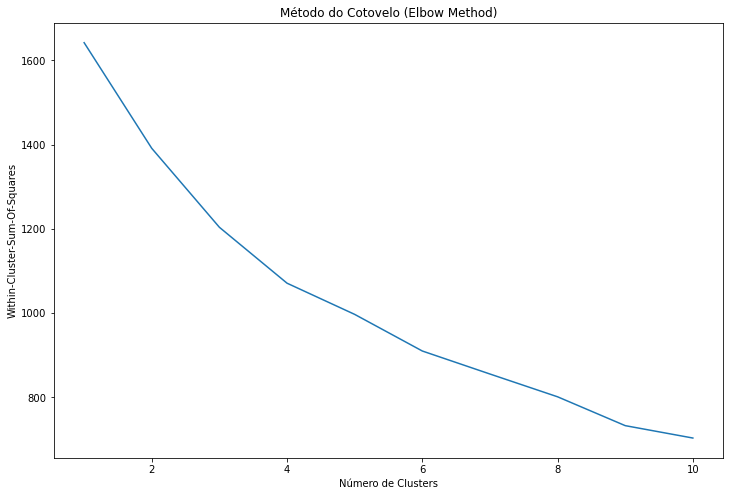

In [157]:
# Método do cotovelo (Elbow Method) para determinar o valor do K
# Segundo esta heurística, o melhor valor para K é 4
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss)
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters')
plt.ylabel('Within-Cluster-Sum-Of-Squares')
plt.show()

In [158]:
# Agrupamento com KMeans utilizando 3 clusters
cluster = KMeans(n_clusters = 4, init='k-means++', n_init = 10)
grupos = cluster.fit_predict(X_pacientes)
grupos

array([3, 3, 3, 0, 2, 0, 0, 1, 3, 0, 2, 1, 3, 2, 0, 3, 2, 0, 3, 0, 2, 0,
       3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 1, 3, 2, 2, 3, 0, 0, 0, 2, 0, 3, 2,
       2, 0, 1, 2, 2, 3, 3, 3, 0, 0, 2, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 2, 0, 2, 1, 3, 0, 0, 0, 0, 3, 2, 3, 3, 1, 2, 3, 2,
       3, 2, 0, 1, 0, 0, 3, 0, 3, 2, 3, 2, 2, 0, 0, 0, 1, 3, 2, 2, 0, 3,
       2, 3, 0, 3, 2, 2, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 3, 2,
       0, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 0, 0, 3, 0, 1, 2, 3, 3, 3, 0,
       0, 0, 2, 2, 0, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 3, 3, 3, 2, 3,
       0, 2, 0, 3, 2, 2, 2, 0, 3, 0, 2, 3, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 2, 0, 0, 0, 3, 3, 0, 3, 0, 2, 0, 3, 0, 1, 3, 2, 0, 0,
       3, 0, 2, 0, 0, 2, 0, 3, 2, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 0, 2, 3,
       0, 2, 3, 3, 0, 3, 0, 2, 0, 3, 0, 2, 2, 0, 0, 3, 0, 0, 3, 0, 2, 2,
       3, 0, 3, 0, 2, 3, 1, 3, 3, 0, 0, 0, 3, 3, 2, 3, 0, 3, 3, 3, 2, 0,
       2, 1, 2, 0, 0, 3, 3, 2, 0, 0, 2, 0, 3, 0, 2,

In [159]:
# Contagem de registros por cluster
unicos, qnt = np.unique(grupos, return_counts = True)
print(f'Grupos: {unicos}')
print(f'Quantidades de pacientes em cada grupo: {qnt}')

Grupos: [0 1 2 3]
Quantidades de pacientes em cada grupo: [358  84 232 326]


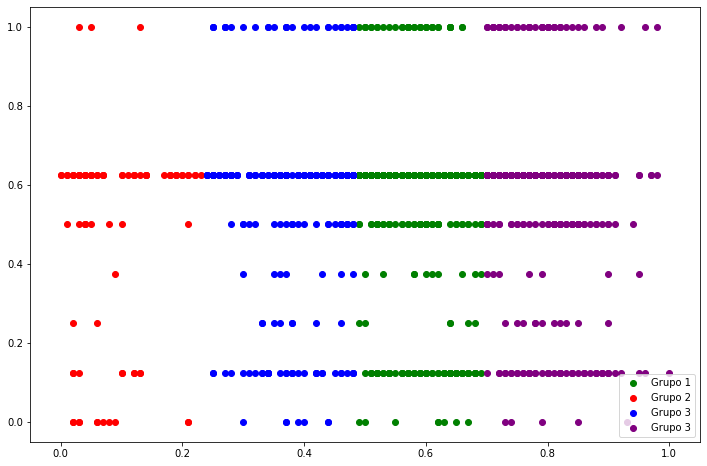

In [211]:
# Gráfico de dispersão para visualizar os clusters
x = df.to_numpy()
plt.figure(figsize=(12, 8))
plt.scatter(x[grupos == 0, 1], x[grupos == 0, 32], label='Grupo 1', c='green')
plt.scatter(x[grupos == 1, 1], x[grupos == 1, 32], label='Grupo 2', c='red')
plt.scatter(x[grupos == 2, 1], x[grupos == 2, 32], label='Grupo 3', c='blue')
plt.scatter(x[grupos == 3, 1], x[grupos == 3, 32], label='Grupo 3', c='purple')
plt.legend()

In [178]:
# Criação de coluna de Grupos de pacientes
df['Cluster_pacientes'] = grupos
df.iloc[:10, [1, 32, 39]]

,NU_IDADE_N,RAIOX_RES,Cluster_pacientes
0,0.76,0.625,3
1,0.86,0.625,3
2,0.95,0.375,3
3,0.54,0.125,0
4,0.37,0.125,2
5,0.52,0.125,0
6,0.52,0.625,0
7,0.02,0.625,1
8,0.77,0.125,3
9,0.60,0.625,0


In [133]:
# O erro do agrupamento
cluster.inertia_

113280.84343449783

As principais características que diferenciam estes grupos de pacientes são a Idade e o Raio X de tórax, pois são a que possuem mais variações de dados, portanto influenciou na clusterização.

### 4.1.2 Grupos de Estados

Agrupamento de estados utilizando as variáveis de número de casos e de internações.

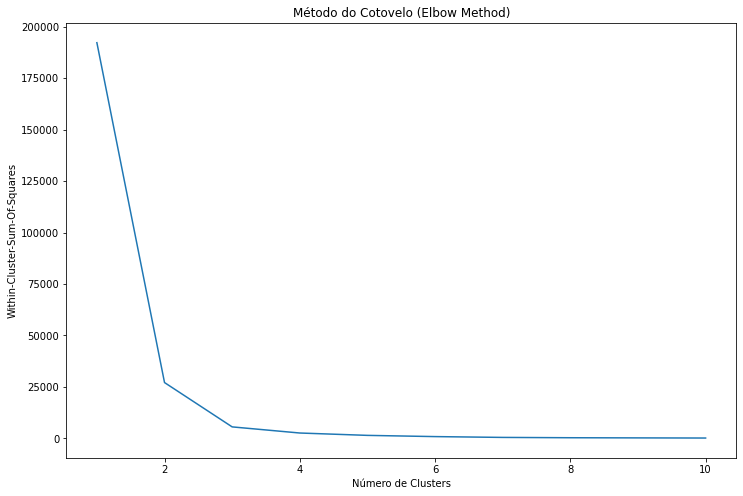

In [108]:
# Método do cotovelo (Elbow Method) para determinar o valor do K
# Segundo esta heurística, o melhor valor para K é 3
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10)
    kmeans.fit(df_estados)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss)
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters')
plt.ylabel('Within-Cluster-Sum-Of-Squares')
plt.show()

In [214]:
# Agrupamento com KMeans utilizando 3 clusters
cluster = KMeans(n_clusters = 3, init='k-means++', n_init = 10)
grupos = cluster.fit_predict(df_estados)
grupos

array([2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1])

In [215]:
# Contagem de registros por cluster
unicos, qnt = np.unique(grupos, return_counts = True)
print(f'Grupos: {unicos}')
print(f'Quantidades de pacientes em cada grupo: {qnt}')

Grupos: [0 1 2]
Quantidades de pacientes em cada grupo: [ 5 21  1]


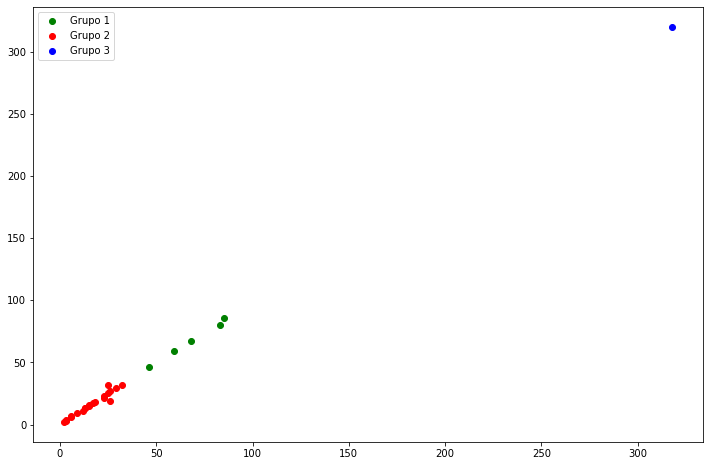

In [216]:
# Gráfico de dispersão para visualizar os clusters
x = df_estados.to_numpy()
plt.figure( figsize=(12, 8) )
plt.scatter(x[grupos == 0, 0], x[grupos == 0, 1], label='Grupo 1', c='green')
plt.scatter(x[grupos == 1, 0], x[grupos == 1, 1], label='Grupo 2', c='red')
plt.scatter(x[grupos == 2, 0], x[grupos == 2, 1], label='Grupo 3', c='blue')
plt.legend()

In [218]:
df_estados['grupos'] = grupos
df_estados

,SG_UF,SG_UF_INTE,grupos
0,318,320,2
1,85,86,0
2,83,80,0
3,13,13,1
4,32,32,1
5,17,17,1
6,59,59,0
7,23,23,1
8,18,18,1
9,26,19,1


In [227]:
# O erro do agrupamento
cluster.inertia_

5572.095238095237

Como mencionado anteriormente, as variáveis utilizadas para agrupar os estados são o número de casos e número de internações.
É importante mencionar o grupo 2 que possui apenas um estado, São Paulo, pois nele ocorreu um número muito grande de casos e internações no período em que os dados foram coletados. 

### 4.2. Detecção de Anomalias

Com todos os dados preparados, iremos detectar anomalias na base de dados utilizando o algoritmo KNN.

In [21]:
# Para usar o KNN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

In [219]:
X_paciente = df.iloc[:, :39]
X_paciente.head()

,CS_SEXO,NU_IDADE_N,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,...,ANTIVIRAL,HOSPITAL,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,0.0,0.76,0.125,0.125,0.125,0.125,0.000,0.125,0.125,0.125,...,0.000,0.0,0.125,0.625,1.00,0.000,0.125,0.125,0.125,0.125
1,1.0,0.86,0.125,0.125,0.125,0.000,0.125,0.125,0.000,0.000,...,0.125,0.0,0.125,0.625,0.75,0.125,0.125,0.125,0.125,0.125
2,0.0,0.95,0.000,0.125,0.125,0.125,0.125,0.125,0.000,0.000,...,0.125,0.0,0.125,0.375,1.00,0.125,0.125,0.125,0.125,0.125
3,1.0,0.54,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,...,0.125,0.0,0.125,0.125,0.75,0.000,0.125,0.125,0.125,0.125
4,0.0,0.37,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,...,0.125,0.0,0.125,0.125,1.00,0.000,0.125,0.125,0.125,0.125


### 4.2.1. Paciente

In [220]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(X_paciente)

NearestNeighbors(n_neighbors=3)

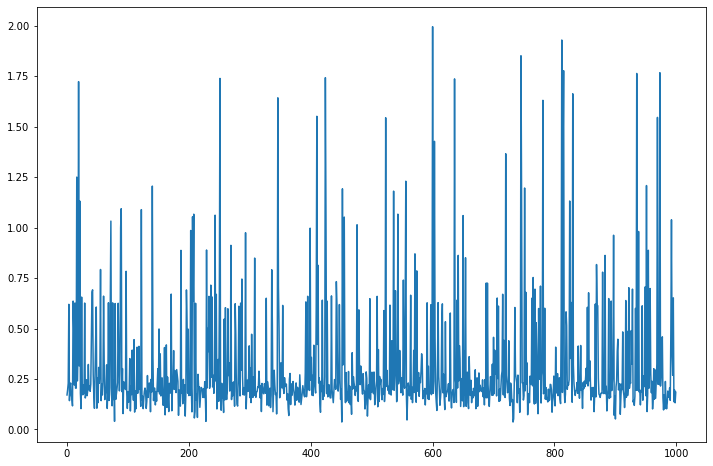

In [222]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(X_paciente)

# plot média de k-distâncias de cada observação 
# Os picos são potenciais anomalias no conjunto de dados
plt.figure(figsize=(12,8))
plt.plot(distancias.mean(axis = 1))

In [224]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 1.95 no eixo y.
# Portanto, utilizaremos este valor como corte para filtrá-lo
# A maior anomalia é o registro 600 da base de dados
outlier_index = np.where(distancias.mean(axis = 1) > 1.95)
outlier_index

(array([600], dtype=int64),)

In [225]:
# Paciente mais anômalo
X_pacientes.iloc[outlier_index]

,CS_SEXO,NU_IDADE_N,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,...,HOSPITAL,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,Cluster_pacientes
600,1,85,9.0,9.0,9.0,9.0,1.0,2.0,1.0,9.0,...,1.0,9.0,6.0,4.0,2.0,2.0,2.0,2.0,2.0,1


In [226]:
# Grau de estranheza
distancias[600].mean()

1.9951626183130882

### 4.2.2. Estado 

O estado que mais se difere dos demais em números de casos e internações.

In [62]:
df_estados.head()

,SG_UF,SG_UF_INTE
0,318,320
1,85,86
2,83,80
3,13,13
4,32,32


In [63]:
# Instanciando o modelo considerando os 3 vizinhos mais próximos
knn = NearestNeighbors(n_neighbors = 3)
knn.fit(df_estados)

NearestNeighbors(n_neighbors=3)

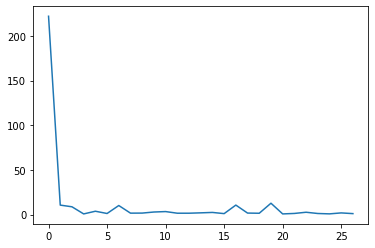

In [64]:
# distâncias e índices de k-vizinhos das saídas do modelo
distancias, indices = knn.kneighbors(df_estados)

# plot média de k-distâncias de cada observação 
# Os picos são potenciais anomalias no conjunto de dados
plt.plot(distancias.mean(axis = 1))

In [65]:
# Visualizando o gráfico percebe-se que o registro mais anômalo está acima de 200 no eixo y.
outlier_index = np.where(distancias.mean(axis = 1) > 200)
outlier_index

(array([0], dtype=int64),)

In [68]:
# O estado de São Paulo é a anomalia pois possui números absurdos de casos de SRAG e internações.
outlier = df_estados.iloc[outlier_index]
outlier

,SG_UF,SG_UF_INTE
0,318,320


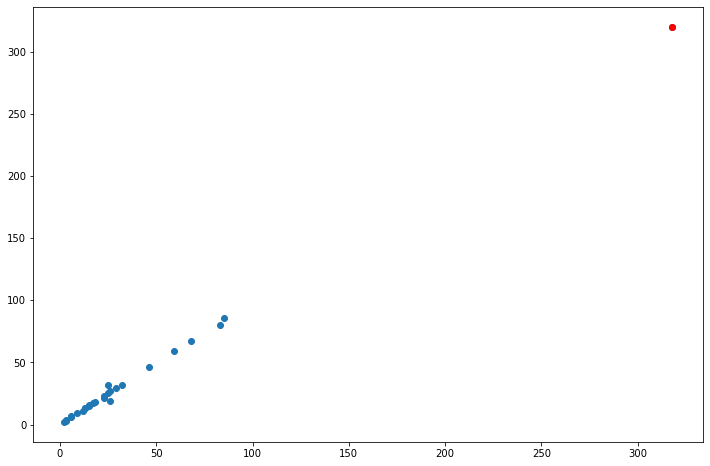

In [76]:
plt.figure(figsize=(12, 8))
plt.scatter(df_estados.SG_UF, df_estados.SG_UF_INTE)
plt.scatter(outlier.SG_UF, outlier.SG_UF_INTE, color='r')